# 2. Artificial Neural Network with Keras
+ City and Highway CO2 Prediction Experimentations

In [1]:
# Load Libraries

import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib import rc

import pandas as pd
import numpy as np
plt.style.use('ggplot')
import seaborn as sns
import mpl_toolkits
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import tensorflow as tf
from keras import models, layers
from tensorflow import keras
from pylab import rcParams

from matplotlib import rc
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from subprocess import check_output

%matplotlib inline

%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

import os

# Hide Warnings

import warnings
warnings.filterwarnings('ignore')

# (1) City Route CO2 Prediction

### Data Loading & Partition 

In [2]:
df = pd.read_csv('CO2_Cleaned.csv')

df = df.drop(['Hway_Mileage', 'Min_Wght'], axis = 1)

target_col = "CO2"

X = df.loc[:, df.columns != target_col].values
Y = df.loc[:, target_col].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_SEED)

Scaling Data for ANN

In [3]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [4]:
# Number of features to input
num_features = len(X_train[1,:])

### Model Development

In [5]:
# Artificial Neural Networks with Keras

tf.keras.mixed_precision.experimental.set_policy('float64')
np.random.seed(10)
classifier = Sequential()

# Defining Model
classifier.add(Dense(52, kernel_initializer = 'uniform', activation = 'tanh', input_dim = num_features)) 
classifier.add(Dense(1, kernel_initializer = 'uniform'))
classifier.compile(optimizer = 'sgd', loss = 'mean_squared_error')        
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=500) 

history_mse = classifier.fit(X_train, y_train, epochs = 100,
                             callbacks = [early_stopping_monitor], 
                             verbose = 0, validation_split = 0.2)

print('Loss: ', history_mse.history['loss'][-1], '\nVal_loss: ', history_mse.history['val_loss'][-1])

Loss:  0.0004926720464562814 
Val_loss:  0.00048084931575024663


### Model Evaluation

Root-Squared Value

In [6]:
# Train R2
y_pred_test = classifier.predict(X_test)

r2_test = r2_score(y_test, y_pred_test)

print('Test R2:', r2_test)

# Train R2
y_pred_train = classifier.predict(X_train)

r2_train = r2_score(y_train, y_pred_train)

print('Train R2:', r2_train)

Test R2: 0.9906388913603907
Train R2: 0.9913836265762528


Mean Square Error

In [7]:

# Test MSE
score_mse_test = classifier.evaluate(X_test, y_test)
print('Test MSE:', score_mse_test)

#Train MSE
score_mse_train = classifier.evaluate(X_train, y_train)
print('Train MSE:', score_mse_train)

120/120 [==============================] - 0s 501us/step - loss: 5.1997e-04
Test MSE: 0.0005199748227111354
480/480 [==============================] - 0s 589us/step - loss: 4.8710e-04
Train MSE: 0.0004871042136122412


Root Mean Sqaure Error

In [8]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))
       
# Rerunning the ANN with Keras
np.random.seed(42)
classifier = Sequential()
     
classifier.add(Dense(52, kernel_initializer = 'uniform', activation = 'tanh', input_dim = num_features)) 
classifier.add(Dense(1, kernel_initializer = 'uniform'))

classifier.compile(optimizer = 'sgd', loss = root_mean_squared_error) 
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=500)

history = classifier.fit(X_train, y_train, epochs = 100, callbacks = [early_stopping_monitor], 
                         verbose = 0, validation_split = 0.2)

print('Loss: ', history.history['loss'][-1], '\nVal_loss: ', history.history['val_loss'][-1])

Loss:  0.01698184114297911 
Val_loss:  0.02280265277293479


Test & Train Data Evaluation

In [9]:
# Test RMSE
score_rmse_test = classifier.evaluate(X_test, y_test)
print('Test RMSE:', score_rmse_test)

# Train RMSE
score_rmse_train = classifier.evaluate(X_train, y_train)
print('Train RMSE:', score_rmse_train)

120/120 [==============================] - 0s 723us/step - loss: 0.0229
Test RMSE: 0.022895724498801534
480/480 [==============================] - 0s 475us/step - loss: 0.0228
Train RMSE: 0.022758670330397194


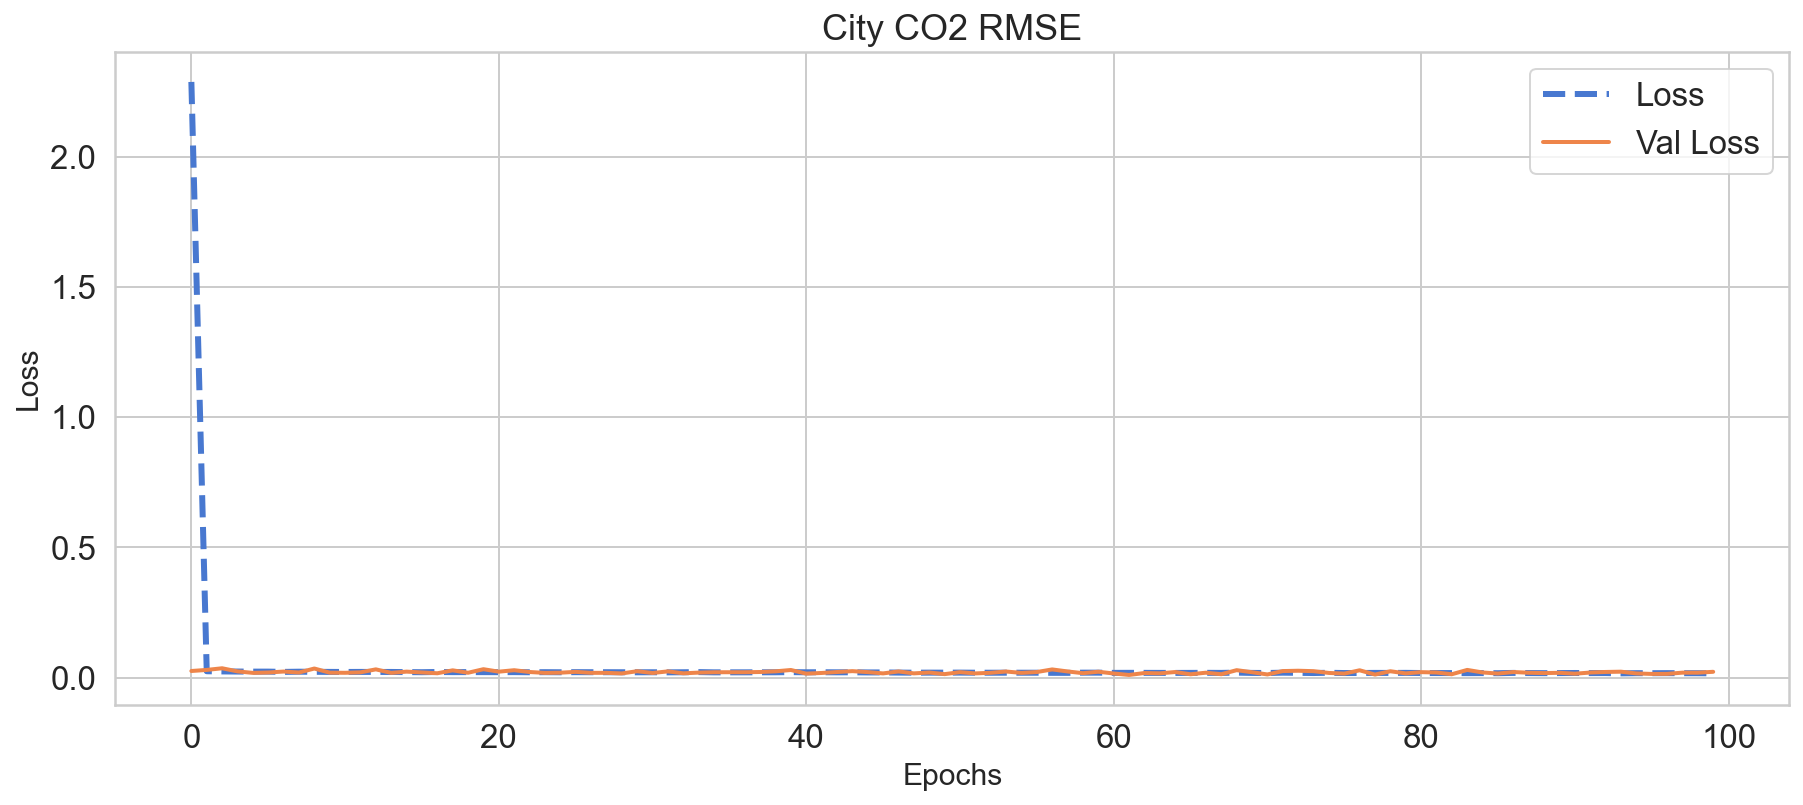

In [10]:
# Plotting RMSE

plt.figure(figsize=(15, 6))
plt.plot(history.history['loss'], lw =3, ls = '--', label = 'Loss')
plt.plot(history.history['val_loss'], lw =2, ls = '-', label = 'Val Loss')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('City CO2 RMSE')
plt.legend()

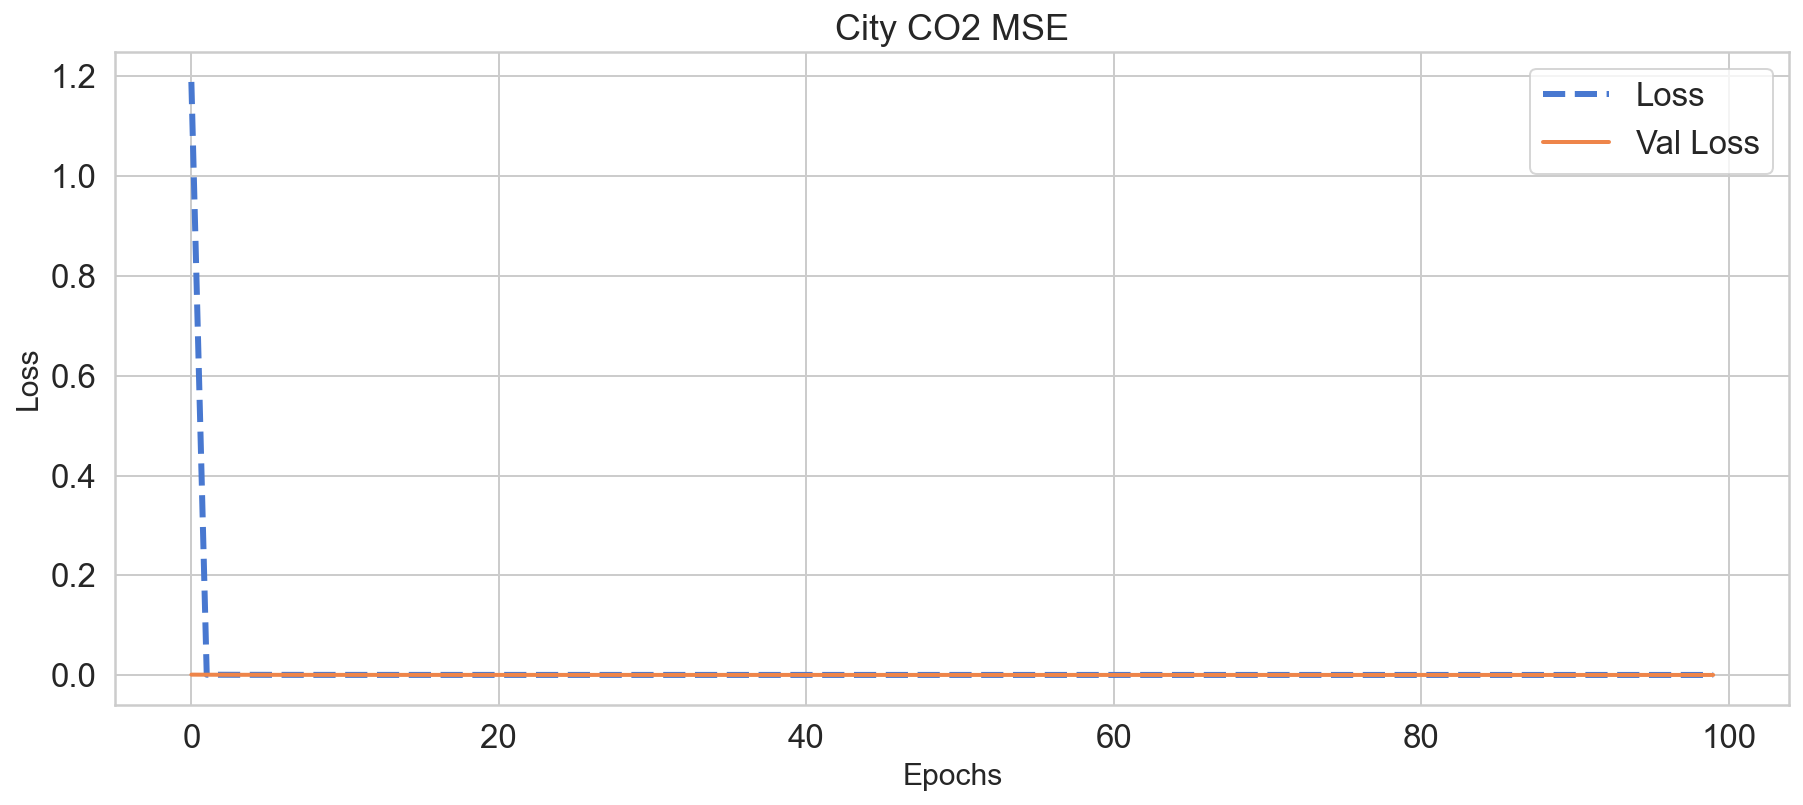

In [11]:
# Plotting Evaluation

plt.figure(figsize=(15, 6))
plt.plot(history_mse.history['loss'], lw =3, ls = '--', label = 'Loss')
plt.plot(history_mse.history['val_loss'], lw =2, ls = '-', label = 'Val Loss')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('City CO2 MSE')
plt.legend()

Predicting Values with MSE Model

+ Predicting First Row

In [12]:
pred_value = np.array([4.990433,2.424803,2.054124,-0.435409,-3.442019,-1.947701,-6.214608,7.316548,0.0,0.0]).reshape(1,-1)

pred_value = sc_X.transform(pred_value)

# Predicted value
pred_mse = classifier.predict(pred_value)
print('Predicted value: ',pred_mse)
print('Real value: ','5.204')

Predicted value:  [[5.22343096]]
Real value:  5.204


Predicting Values with MSE Model

+ Predicting Fourth Row

In [13]:
# Predicting the 4 value at test set
pred_values = np.array([4.828314,1.931521,1.667707,-2.813411,-1.807889,-1.645065,-6.907755,7.355641,0.0,0.0]).reshape(1, -1)

# Scaling new values to the same pattern used in the model
pred_values = sc_X.transform(pred_values)

# Predictied value by model
pred_mse_4 = classifier.predict(pred_values)
print('Predicted value: ',pred_mse_4)
print('Real value: ','4.934')

Predicted value:  [[4.92083864]]
Real value:  4.934


Prediction Vs Actual Carbon Emissions

In [14]:
ANN_Model = pd.DataFrame({
    'Model': ['Test Set Score', 'Train Set Score', 'Predict first Line [182]', 'Predict Test Set Value [139]',
              'Last Epoch Loss', 'Last Epoch Val Loss'],
    
    'MSE': [np.sqrt(score_mse_test), np.sqrt(score_mse_train), pred_mse[0], pred_mse_4[0],
            np.sqrt(history_mse.history['loss'][-1]), np.sqrt(history_mse.history['val_loss'][-1])],
    
    'RMSE': [score_rmse_test, score_rmse_train, pred_mse[0], pred_mse_4[0], history.history['loss'][-1],
             history.history['val_loss'][-1]]
})
ANN_Model

Model                   MSE                  RMSE
0                Test Set Score              0.022803             0.0228957
1               Train Set Score             0.0220704             0.0227587
2      Predict first Line [182]  [5.2234309559251635]  [5.2234309559251635]
3  Predict Test Set Value [139]  [4.9208386388334535]  [4.9208386388334535]
4               Last Epoch Loss             0.0221962             0.0169818
5           Last Epoch Val Loss             0.0219283             0.0228027

Plotting Predicted vs Actual Regression

In [15]:
y_pred= classifier.predict(X_test)

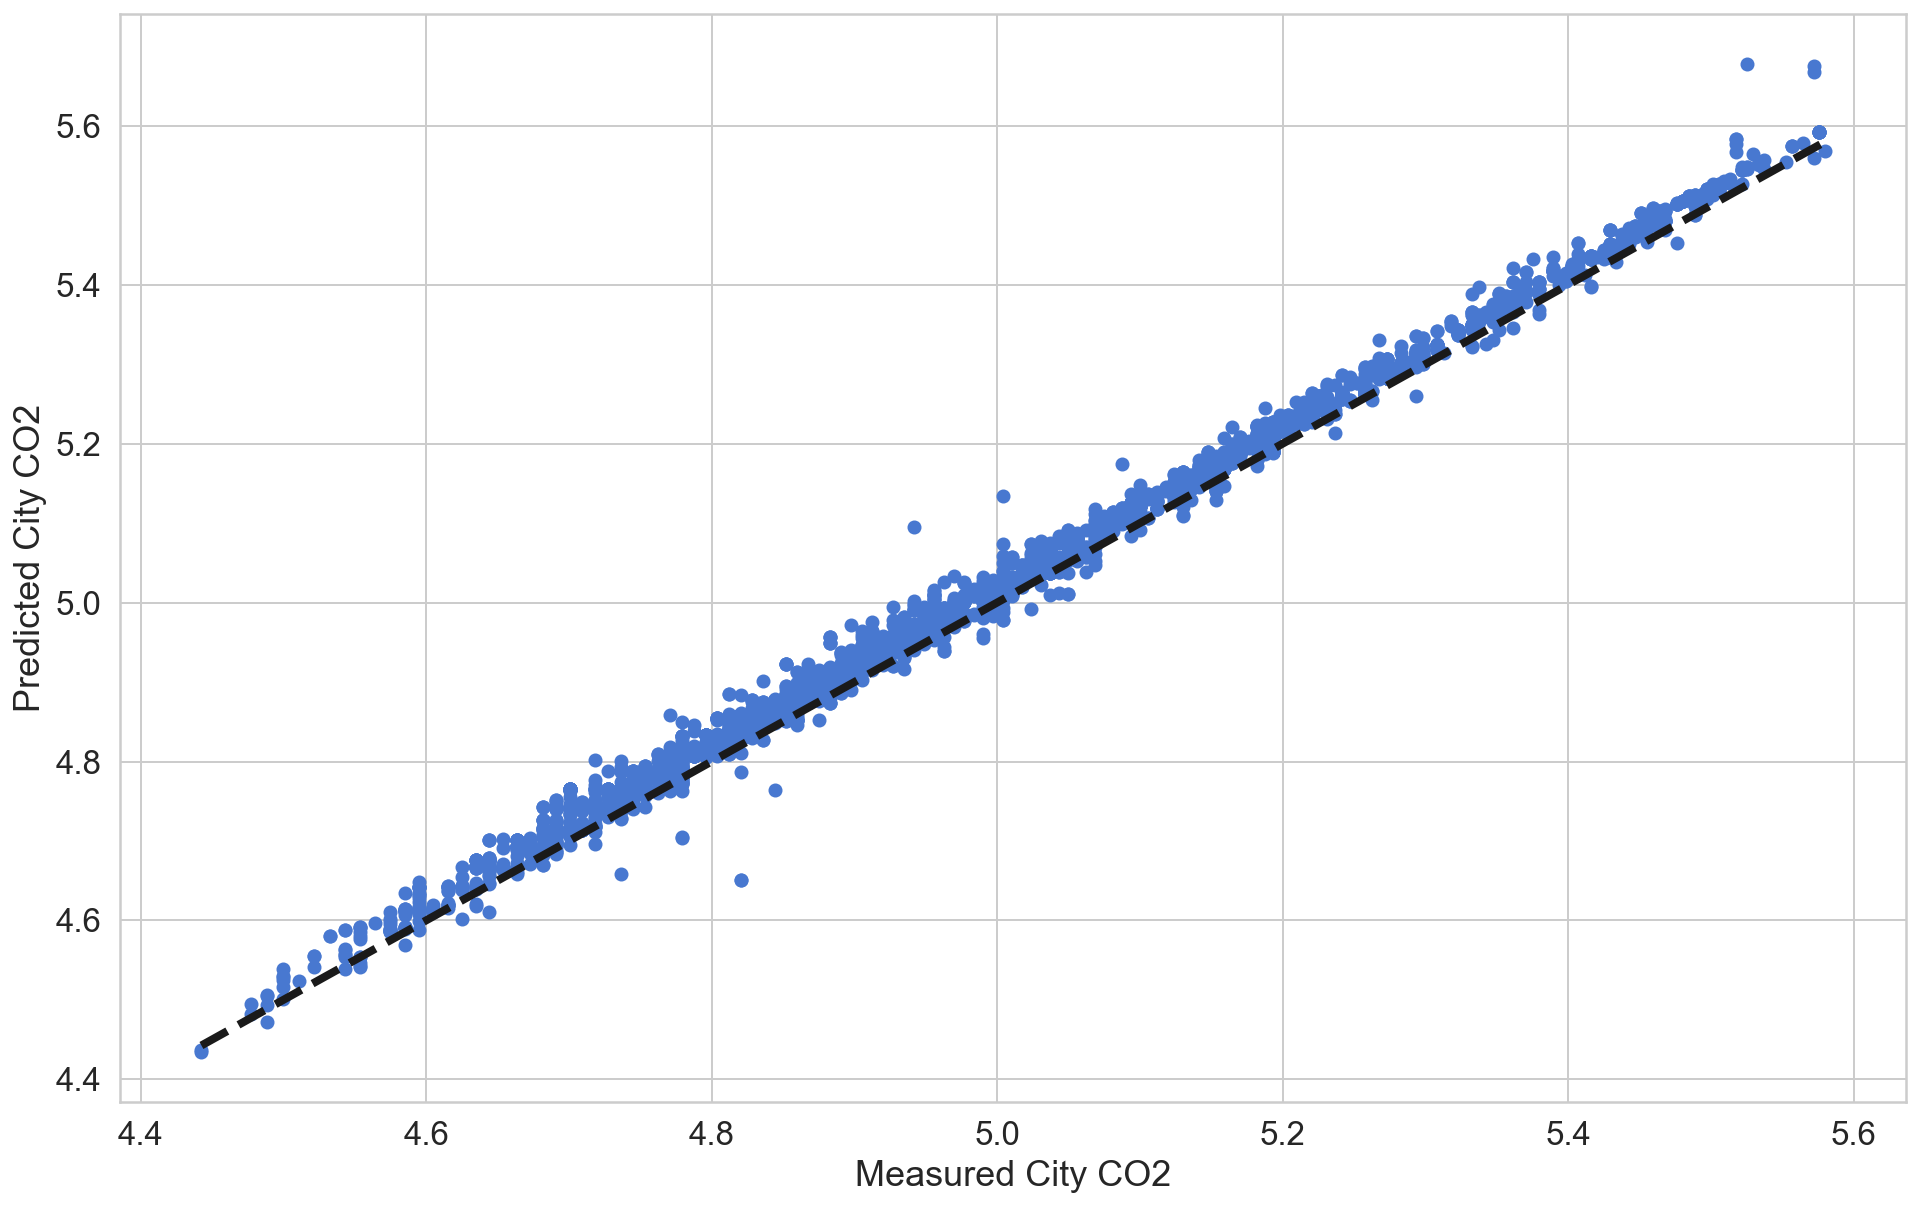

In [16]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured City CO2')
ax.set_ylabel('Predicted City CO2')
plt.show()

# (2) Highway Route CO2 Prediction

### Data Loading & Partition 

In [17]:
df = pd.read_csv('CO2_Cleaned.csv')

df = df.drop(['City_Mileage', 'Min_Wght'], axis = 1)

target_col = "CO2"

X = df.loc[:, df.columns != target_col]
Y = df.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_SEED)

Scaling Data for ANN

In [18]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [19]:
# Number of features to input
num_features = len(X_train[1,:])

### Model Development

In [20]:
# Artificial Neural Networks with Keras

tf.keras.mixed_precision.experimental.set_policy('float64')
np.random.seed(10)
classifier = Sequential()

# Defining Model
classifier.add(Dense(52, kernel_initializer = 'uniform', activation = 'tanh', input_dim = num_features)) 
classifier.add(Dense(1, kernel_initializer = 'uniform'))
classifier.compile(optimizer = 'sgd', loss = 'mean_squared_error')        
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=500) 

history_mse = classifier.fit(X_train, y_train, epochs = 100,
                             callbacks = [early_stopping_monitor], 
                             verbose = 0, validation_split = 0.2)

print('Loss: ', history_mse.history['loss'][-1], '\nVal_loss: ', history_mse.history['val_loss'][-1])

Loss:  0.0004621787436949663 
Val_loss:  0.0004503578197403118


### Model Evaluation

R-Squared Value

In [21]:
# Train R2
y_pred_test = classifier.predict(X_test)

r2_test = r2_score(y_test, y_pred_test)

print('Test R2:', r2_test)

# Train R2
y_pred_train = classifier.predict(X_train)

r2_train = r2_score(y_train, y_pred_train)

print('Train R2:', r2_train)

Test R2: 0.991347914475203
Train R2: 0.9919137339377312


Mean Square Error

In [22]:
# Test MSE
score_mse_test = classifier.evaluate(X_test, y_test)

print('Test MSE:', score_mse_test)

#Train MSE
score_mse_train = classifier.evaluate(X_train, y_train)

print('Train MSE:', score_mse_train)

120/120 [==============================] - 0s 432us/step - loss: 4.8059e-04
Test MSE: 0.0004805917023794698
480/480 [==============================] - 0s 432us/step - loss: 4.5714e-04
Train MSE: 0.0004571365260488893


Root Mean Sqaure Error

In [23]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))
       
# Rerunning the ANN with Keras
np.random.seed(42)
classifier = Sequential()
     
classifier.add(Dense(52, kernel_initializer = 'uniform', activation = 'tanh', input_dim = num_features)) 
classifier.add(Dense(1, kernel_initializer = 'uniform'))

classifier.compile(optimizer = 'sgd', loss = root_mean_squared_error) 
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=500)

history = classifier.fit(X_train, y_train, epochs = 100, callbacks = [early_stopping_monitor], 
                         verbose = 0, validation_split = 0.2)

print('Loss: ', history.history['loss'][-1], '\nVal_loss: ', history.history['val_loss'][-1])

Loss:  0.016651199659609997 
Val_loss:  0.026942656279877485


Test & Train Data Evaluation

In [24]:
# Test RMSE
score_rmse_test = classifier.evaluate(X_test, y_test)
print('Test RMSE:', score_rmse_test)

# Train RMSE
score_rmse_train = classifier.evaluate(X_train, y_train)
print('Train RMSE:', score_rmse_train)

120/120 [==============================] - 0s 445us/step - loss: 0.0269
Test RMSE: 0.026865867563397865
480/480 [==============================] - 0s 442us/step - loss: 0.0268
Train RMSE: 0.02680978769817019


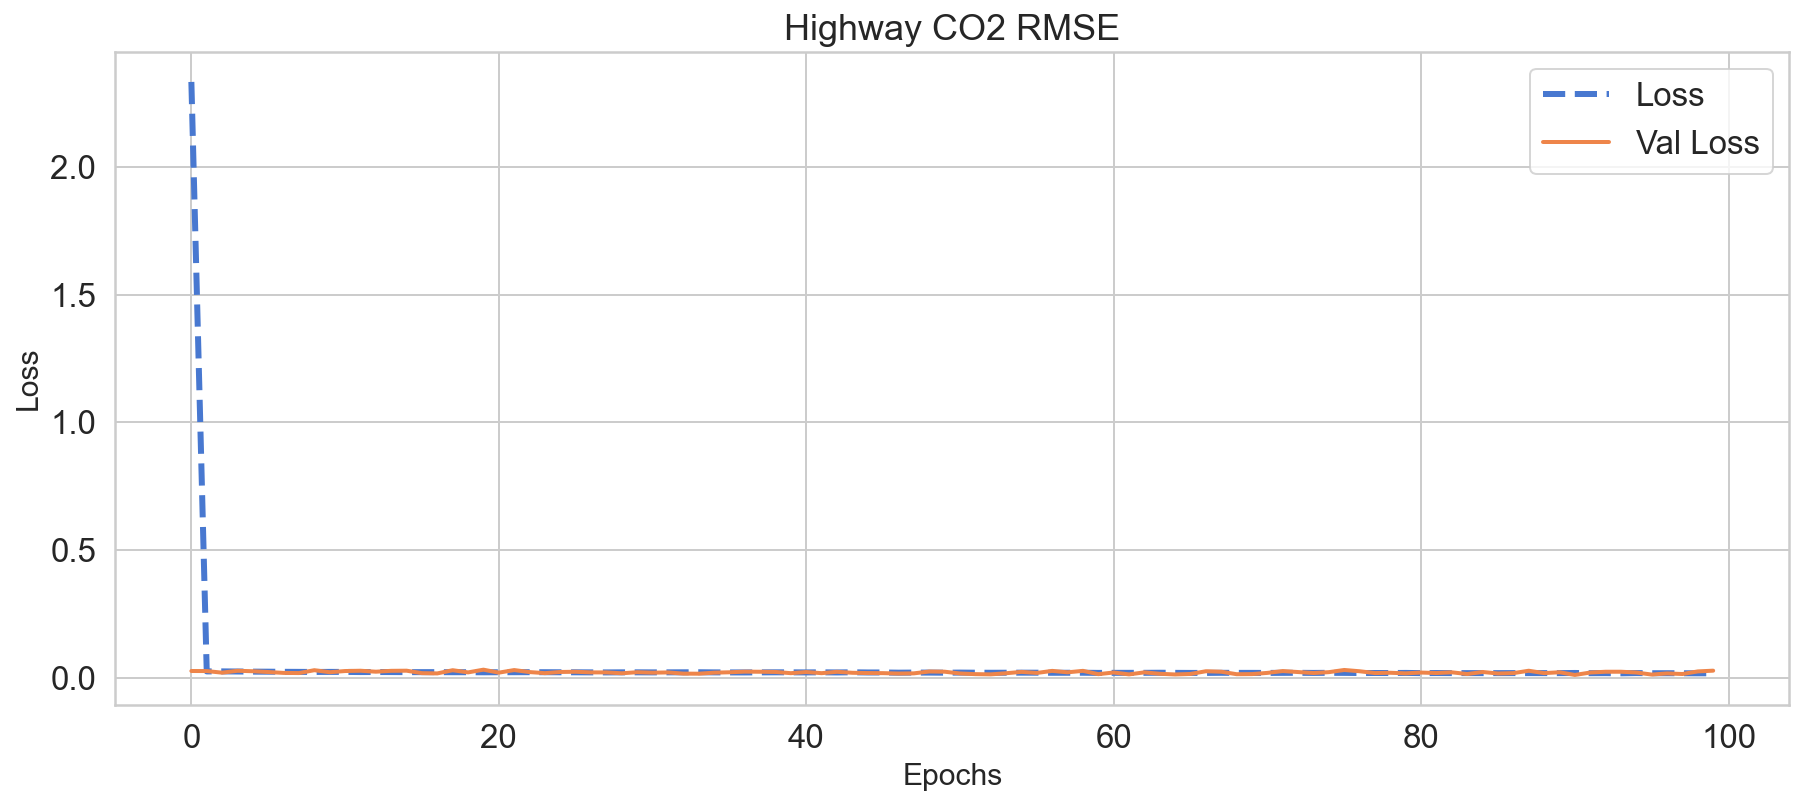

In [34]:
# Plotting RMSE

plt.figure(figsize=(15, 6))
plt.plot(history.history['loss'], lw =3, ls = '--', label = 'Loss')
plt.plot(history.history['val_loss'], lw =2, ls = '-', label = 'Val Loss')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('Highway CO2 RMSE')
plt.legend()

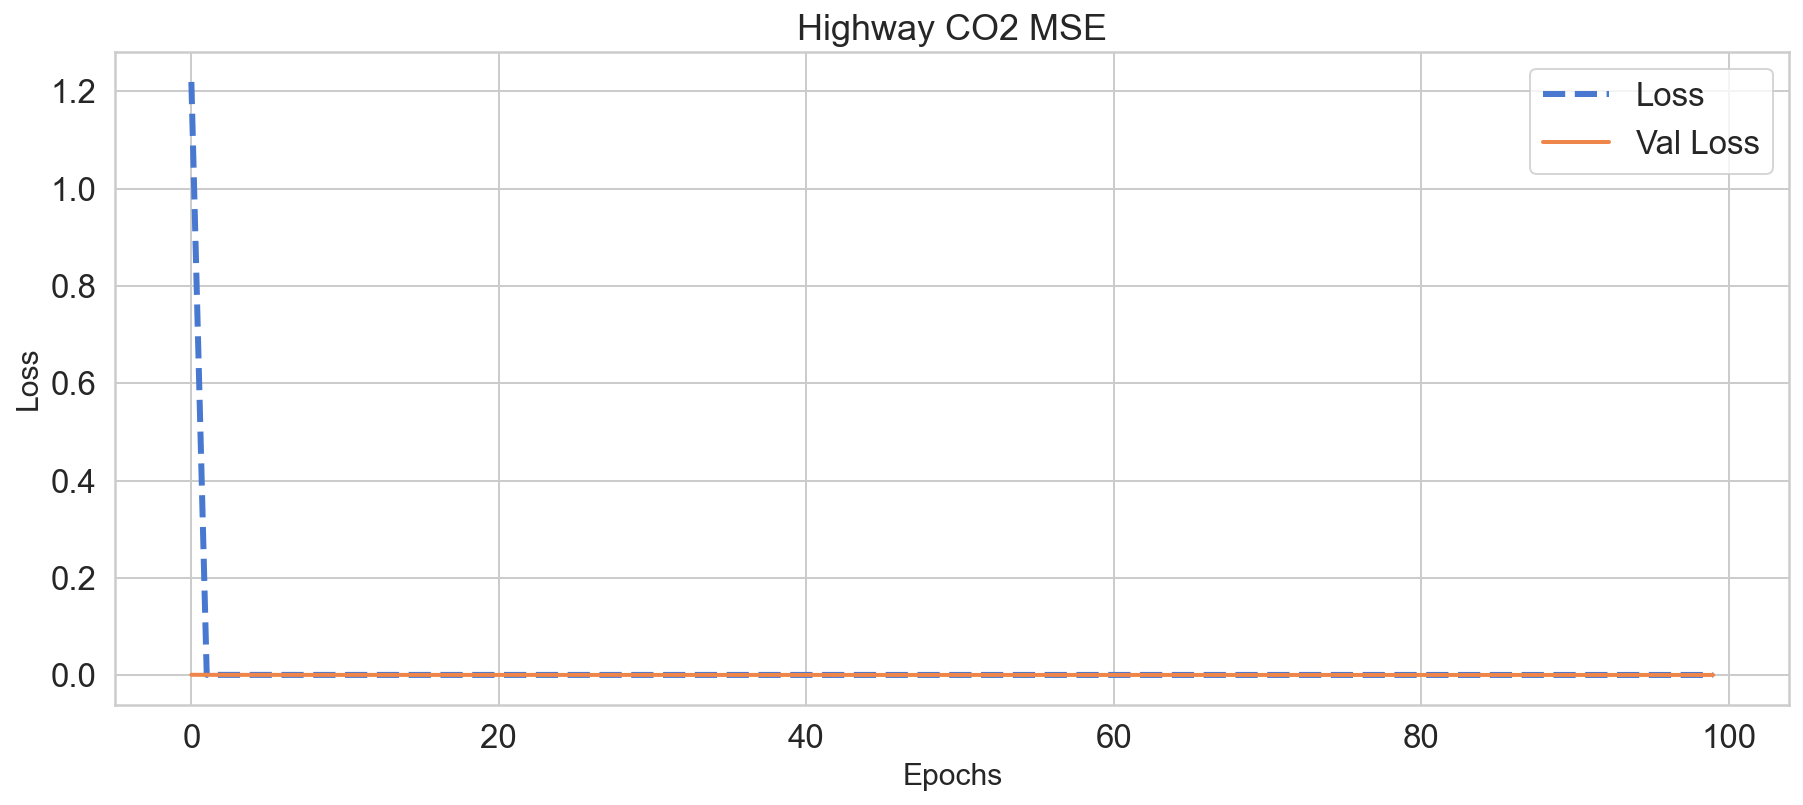

In [26]:
# Plotting Evaluation

plt.figure(figsize=(15, 6))
plt.plot(history_mse.history['loss'], lw =3, ls = '--', label = 'Loss')
plt.plot(history_mse.history['val_loss'], lw =2, ls = '-', label = 'Val Loss')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('Highway CO2 MSE')
plt.legend()

Predicting Values with MSE Model

+ Predicting First Row

In [27]:
pred_value = np.array([4.990433,2.424803,2.054124,-0.435409,-3.442019,-1.947701,-6.214608,7.316548,0.0,0.0]).reshape(1,-1)

pred_value = sc_X.transform(pred_value)

# Predicted value
pred_mse = classifier.predict(pred_value)
print('Predicted value: ',pred_mse)
print('Real value: ','5.204')

Predicted value:  [[5.28784137]]
Real value:  5.204


In [28]:
df

Max_HP  Hway_Mileage  Mix_Mileage       CO2      CO_1       NOC  \
0      4.990433      1.757858     2.054124  5.204007 -0.435409 -3.442019   
1      4.828314      1.458615     1.629241  4.912655 -1.650260 -1.777857   
2      4.605170      1.435085     1.629241  4.897840 -2.718101 -1.903809   
3      4.605170      1.435085     1.629241  4.897840 -2.718101 -1.903809   
4      4.828314      1.458615     1.667707  4.934474 -2.813411 -1.807889   
...         ...           ...          ...       ...       ...       ...   
19177  5.459586      1.945910     2.079442  5.225747 -1.496109 -3.863233   
19178  5.105945      1.686399     1.740466  5.003946 -1.177655 -2.577022   
19179  5.105945      1.686399     1.740466  5.003946 -1.177655 -2.577022   
19180  5.105945      1.704748     1.757858  5.023881 -1.197328 -2.590267   
19181  5.105945      1.704748     1.757858  5.023881 -1.197328 -2.590267   

          HCNOX      PTCL  Max_Wght  Gas_ES   Gas_GO   
0     -1.947701 -6.214608  7.316548      0.0      0.0  
1     -1.660731 -5.809143  7.355641      0.0      0.0  
2     -1.742969 -6.907755  7.355641      0.0      0.0  
3     -1.742969 -6.907755  7.355641      0.0      0.0  
4     -1.645065 -6.907755  7.355641      0.0      0.0  
...         ...       ...       ...      ...      ...  
19177 -1.947701 -6.214608  7.617268      0.0      0.0  
19178 -2.128632 -6.907755  7.619724      0.0      0.0  
19179 -2.128632 -6.907755  7.619724      0.0      0.0  
19180 -2.128632 -6.907755  7.619724      0.0      0.0  
19181 -2.128632 -6.907755  7.619724      0.0      0.0  

[19182 rows x 11 columns]

Predicting Values with MSE Model

+ Predicting Fourth Row

In [29]:
# Predicting the 4 value at test set
pred_values = np.array([4.828314,1.931521,1.667707,-2.813411,-1.807889,-1.645065,-6.907755,7.355641,0.0,0.0]).reshape(1, -1)

# Scaling new values to the same pattern used in the model
pred_values = sc_X.transform(pred_values)

# Predictied value by model
pred_mse_4 = classifier.predict(pred_values)
print('Predicted value: ',pred_mse_4)
print('Real value: ','4.934')

Predicted value:  [[4.95918872]]
Real value:  4.934


Prediction Vs Actual Carbon Emissions

In [30]:
ANN_Model = pd.DataFrame({
    'Model': ['Test Set Score', 'Train Set Score', 'Predict first Line [182]', 'Predict Test Set Value [139]',
              'Last Epoch Loss', 'Last Epoch Val Loss'],
    
    'MSE': [np.sqrt(score_mse_test), np.sqrt(score_mse_train), pred_mse[0], pred_mse_4[0],
            np.sqrt(history_mse.history['loss'][-1]), np.sqrt(history_mse.history['val_loss'][-1])],
    
    'RMSE': [score_rmse_test, score_rmse_train, pred_mse[0], pred_mse_4[0], history.history['loss'][-1],
             history.history['val_loss'][-1]]
})
ANN_Model

Model                  MSE                 RMSE
0                Test Set Score            0.0219224            0.0268659
1               Train Set Score            0.0213808            0.0268098
2      Predict first Line [182]  [5.287841365154457]  [5.287841365154457]
3  Predict Test Set Value [139]  [4.959188717695426]  [4.959188717695426]
4               Last Epoch Loss            0.0214983            0.0166512
5           Last Epoch Val Loss            0.0212216            0.0269427

Plotting Predicted vs Actual Regression

In [31]:
y_pred= classifier.predict(X_test)

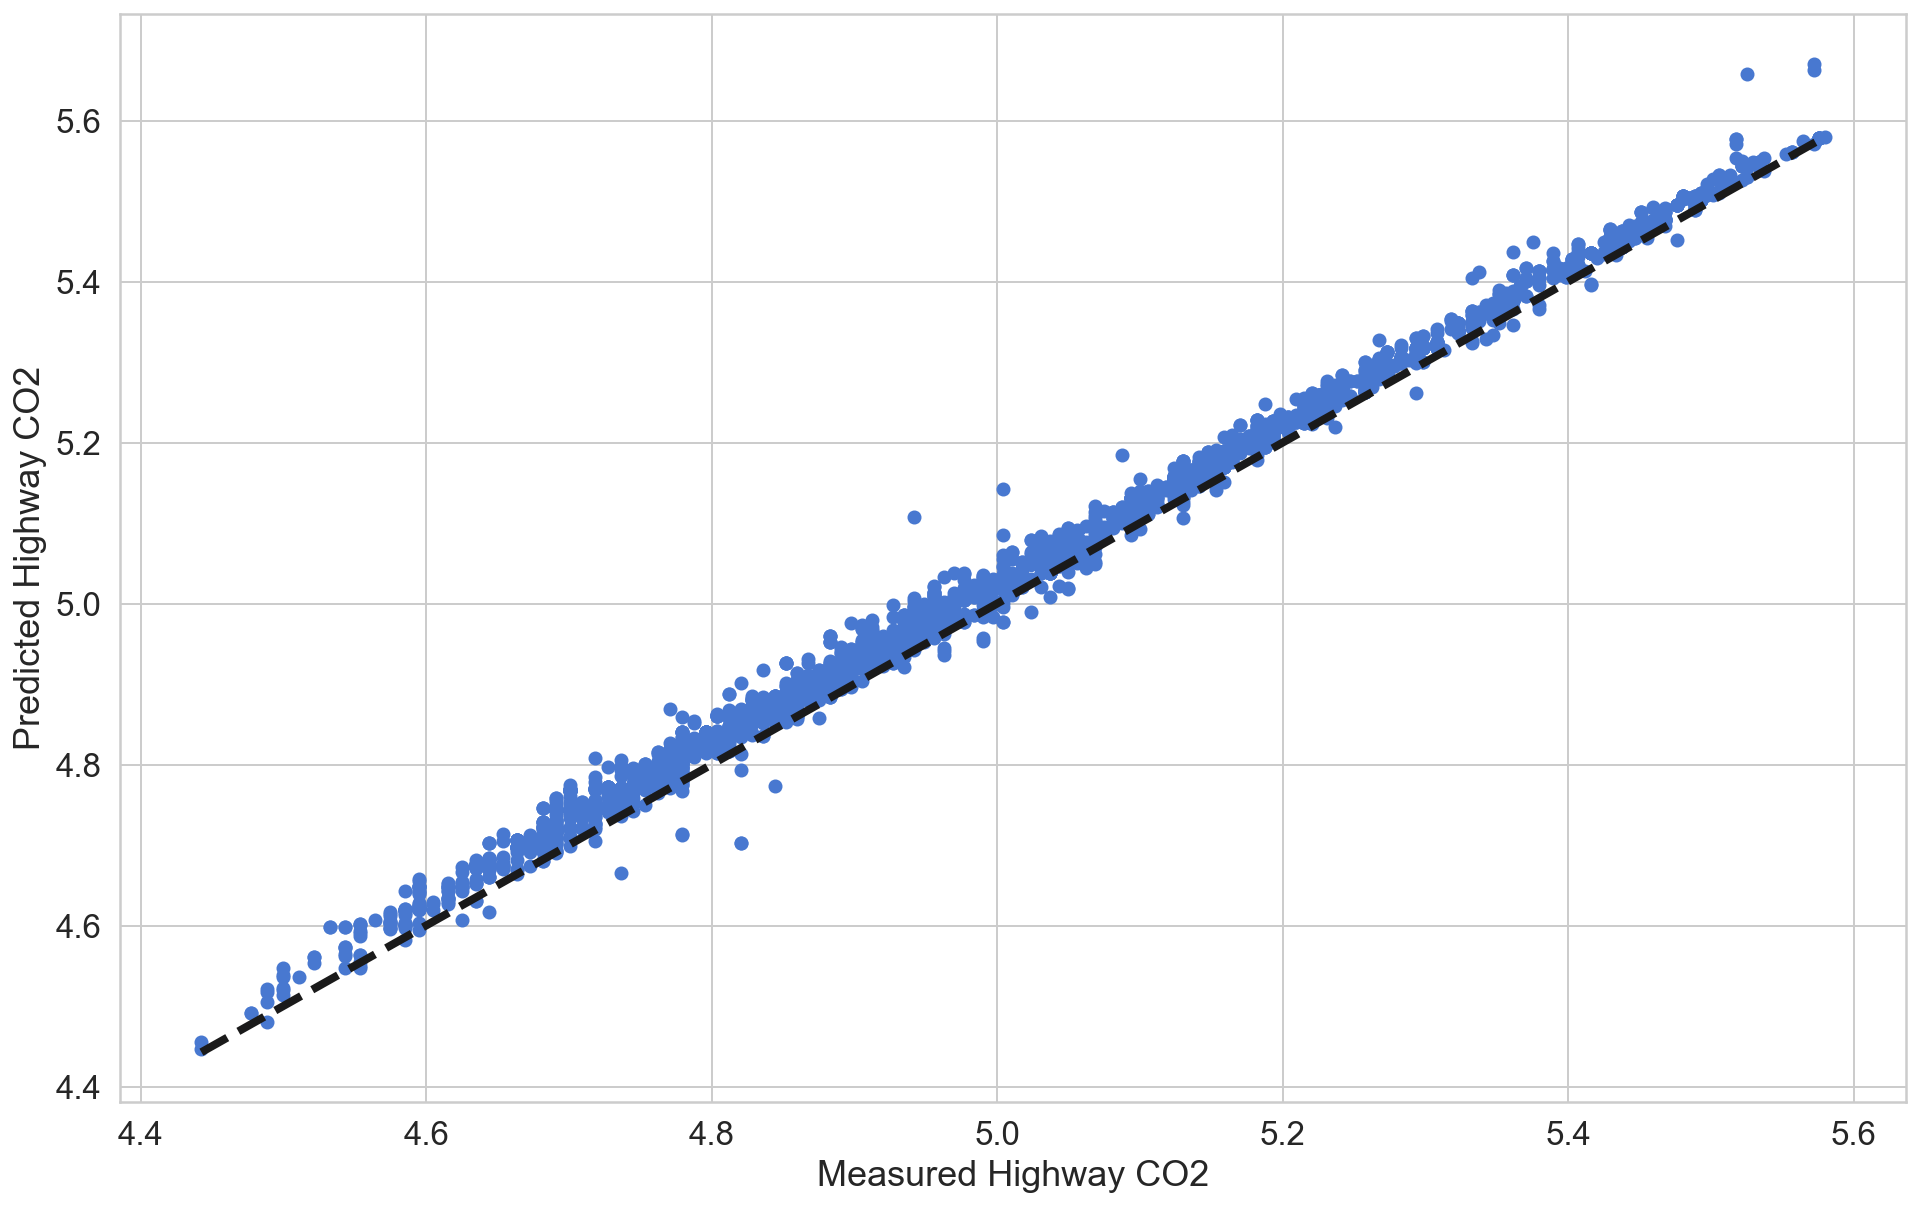

In [32]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured Highway CO2')
ax.set_ylabel('Predicted Highway CO2')
plt.show()

In [33]:
# Print ANN Topology
from ann_visualizer.visualize import ann_viz

ann_viz(classifier, view=True, filename='ANN.gv', title='Artificial Neural Network')

# CONCLUSION 
+ Second best performing model, no need to carry out predictions.